# Hate Crime Data Analysis (2017-2025)

This notebook analyzes hate crime data spanning from 2017 to 2025, exploring patterns, trends, and relationships between different aspects of hate crimes. The analysis includes data cleaning, exploratory data analysis, visualization, and feature engineering steps that will provide insights for further machine learning applications.

## Dataset Overview

The dataset contains hate crime incidents with details such as:
- Date and location information
- Victim and offender demographics
- Types of offenses and biases
- Geographic information (Zip Code, Council District)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("hate-crime_2017-2025.csv")

## Data Import and Initial Setup

First, we'll import the necessary libraries and load the hate crime dataset from CSV.

In [ ]:
# Import required libraries for data analysis and visualization
import pandas as pd
import matplotlib.pyplot as plt

# Load the hate crime dataset from CSV file
df = pd.read_csv("hate-crime_2017-2025.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Month                         266 non-null    object 
 1   Incident Number               266 non-null    object 
 2   Date of Incident              266 non-null    object 
 3   Day of Week                   266 non-null    object 
 4   Number of Victims under 18    266 non-null    object 
 5   Number of Victims over 18     266 non-null    object 
 6   Number of Offenders under 18  266 non-null    object 
 7   Number of Offenders over 18   264 non-null    object 
 8   Race/Ethnicity of Offenders   266 non-null    object 
 9   Offense(s)                    266 non-null    object 
 10  Offense Location              266 non-null    object 
 11  Bias                          266 non-null    object 
 12  Zip Code                      265 non-null    float64
 13  APD S

## Data Exploration

Let's explore the structure of our dataset to understand its dimensions, column types, and any initial issues.

In [4]:
df.head()

,Month,Incident Number,Date of Incident,Day of Week,Number of Victims under 18,Number of Victims over 18,Number of Offenders under 18,Number of Offenders over 18,Race/Ethnicity of Offenders,Offense(s),Offense Location,Bias,Zip Code,APD Sector,Council District
0,Jan,2017-241137,01/01/2017 12:00:00 AM,Sun,0,1,0,1,White/Not Hispanic,Aggravated Assault,Park/Playground,Anti-Black or African American,78704.0,Henry,9.0
1,Feb,2017-580344,02/01/2017 12:00:00 AM,Wed,0,1,0,1,Black or African American/Not Hispanic,Aggravated Assault,Highway/Road/Alley/Street/Sidewalk,Anti-White,78702.0,Charlie,1.0
2,Mar,2017-800291,03/21/2017 12:00:00 AM,Tue,0,0,0,0,Unknown,Destruction,Highway/Road/Alley/Street/Sidewalk,Anti-Jewish,78757.0,Ida,7.0
3,Apr,2017-1021534,04/12/2017 12:00:00 AM,Wed,0,0,0,0,White/Unknown,Simple Assault,Air/Bus/Train Terminal,Anti-Jewish,78723.0,Ida,1.0
4,May,2017-1351550,05/15/2017 12:00:00 AM,Mon,1,0,1,2,White/Not Hispanic,Simple Assault,Residence/Home,Anti-Gay (Male),78750.0,Adam,6.0


In [ ]:
# Display dataset information including column types and non-null counts
df.info()

df.describe(include='all')

,Month,Incident Number,Date of Incident,Day of Week,Number of Victims under 18,Number of Victims over 18,Number of Offenders under 18,Number of Offenders over 18,Race/Ethnicity of Offenders,Offense(s),Offense Location,Bias,Zip Code,APD Sector,Council District
count,266,266,266,266,266,266,266,264,266,266,266,266,265.000000,265,265.000000
unique,12,265,250,7,3,5,5,7,23,30,49,36,NaN,11,NaN
top,Nov,2023-2431066,08/25/2021 12:00:00 AM,Sun,0,1,0,1,White/Non-Hispanic,Criminal Mischief,Residence/Home,Anti-Black or African American,NaN,Baker,NaN
freq,33,2,3,50,253,231,211,183,70,48,66,58,NaN,49,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78727.664151,NaN,6.018868
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.630024,NaN,3.021956
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78613.000000,NaN,1.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78704.000000,NaN,3.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78731.000000,NaN,7.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78750.000000,NaN,9.000000


In [6]:
df.isnull().sum()

Month                           0
Incident Number                 0
Date of Incident                0
Day of Week                     0
Number of Victims under 18      0
Number of Victims over 18       0
Number of Offenders under 18    0
Number of Offenders over 18     2
Race/Ethnicity of Offenders     0
Offense(s)                      0
Offense Location                0
Bias                            0
Zip Code                        1
APD Sector                      1
Council District                1
dtype: int64

## Data Cleaning

Before proceeding with analysis, we need to handle missing values, convert column types, and address any data inconsistencies.

In [ ]:
# Display the first few rows of the dataset to understand its structure
df.head()

print(df['Number of Victims under 18'].unique())

['0' '1' 'Unknown']


In [ ]:
# Generate descriptive statistics for all columns (including categorical ones)
df.describe(include='all')

df['Number of Victims under 18'] = pd.to_numeric(df['Number of Victims under 18'], errors='coerce')

In [ ]:
# Check for missing values in each column
df.isnull().sum()

df['Date of Incident'] = pd.to_datetime(df['Date of Incident'])

/tmp/ipykernel_9/1229832491.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date of Incident'] = pd.to_datetime(df['Date of Incident'])


In [10]:
df['Date of Incident'] = pd.to_datetime(df['Date of Incident'], errors='coerce')

In [ ]:
# Examine unique values in 'Number of Victims under 18' column to identify any issues
print(df['Number of Victims under 18'].unique())

[ 0.  1. nan]


In [ ]:
# Convert 'Number of Victims under 18' to numeric type, replacing non-numeric values with NaN
df['Number of Victims under 18'] = pd.to_numeric(df['Number of Victims under 18'], errors='coerce')

In [ ]:
# Convert 'Date of Incident' to datetime format for time-based analysis
df['Date of Incident'] = pd.to_datetime(df['Date of Incident'])

df[['Number of Victims under 18', 'Number of Victims over 18', 
    'Number of Offenders under 18', 'Number of Offenders over 18']].isnull().sum()


Number of Victims under 18      1
Number of Victims over 18       0
Number of Offenders under 18    0
Number of Offenders over 18     2
dtype: int64

In [ ]:
df['Zip Code'] = df['Zip Code'].fillna(-1).astype('Int64')
df['Council District'] = df['Council District'].fillna(-1).astype('Int64')
# Convert 'Date of Incident' to datetime with error handling for invalid dates
df['Date of Incident'] = pd.to_datetime(df['Date of Incident'], errors='coerce')

In [ ]:
bias_counts = df['Bias'].value_counts()

# Verify the unique values after conversion to ensure proper handling
print(df['Number of Victims under 18'].unique())

## Exploratory Data Analysis

### Bias Distribution Analysis

Let's analyze the distribution of different bias types in hate crimes to identify the most prevalent categories.

<Axes: ylabel='Bias'>

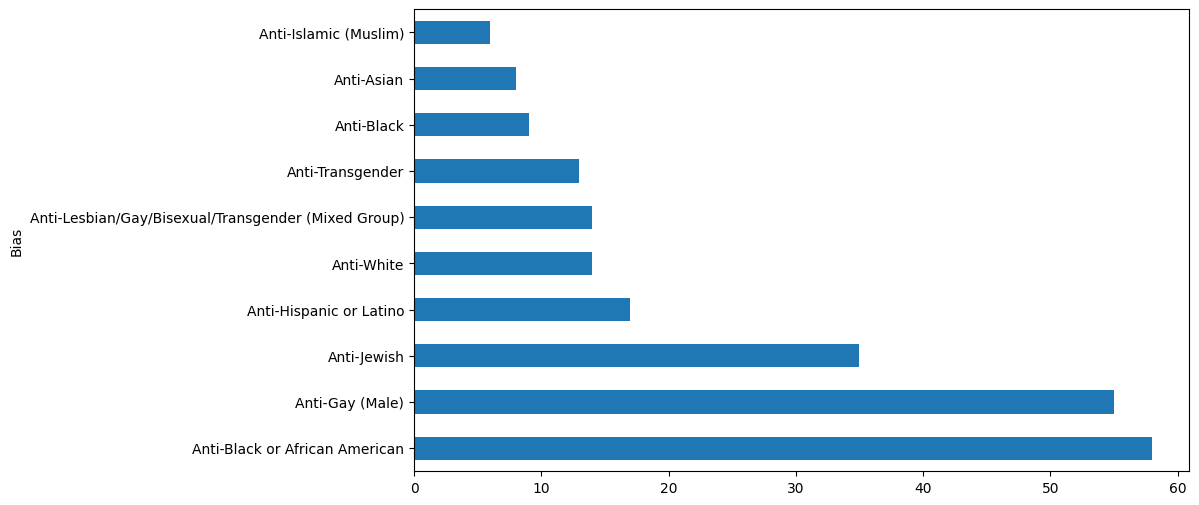

In [ ]:
# Ensure 'Number of Victims under 18' is properly converted to numeric (repeated for confirmation)
df['Number of Victims under 18'] = pd.to_numeric(df['Number of Victims under 18'], errors='coerce')

bias_counts.head(10).plot(kind='barh', figsize=(10,6))

In [ ]:
print("Unique Bias Types:", df['Bias'].nunique())

# Check for missing values in victim and offender count columns
df[['Number of Victims under 18', 'Number of Victims over 18', 
    'Number of Offenders under 18', 'Number of Offenders over 18']].isnull().sum()

Unique Bias Types: 36


In [ ]:
# Fill missing Zip Code and Council District values with -1 and convert to integer type
df['Zip Code'] = df['Zip Code'].fillna(-1).astype('Int64')
df['Council District'] = df['Council District'].fillna(-1).astype('Int64')

df['Year-Month'] = df['Date of Incident'].dt.to_period('M')

### Temporal Analysis

Next, let's examine how hate crimes have changed over time by adding a Year-Month period column for time series analysis.

In [ ]:
top_biases = ['Anti-Black or African American', 'Anti-Gay (Male)', 'Anti-Jewish']
filtered_df = df[df['Bias'].isin(top_biases)]

# Count occurrences of each bias type
bias_counts = df['Bias'].value_counts()

### Analyzing Top Bias Types

Let's focus on the three most prominent bias types for deeper analysis.

In [20]:
grouped = filtered_df.groupby(['Year-Month', 'Bias']).size().unstack().fillna(0)

<Axes: title={'center': 'Top 3 Bias Types Over Time'}, xlabel='Year-Month'>

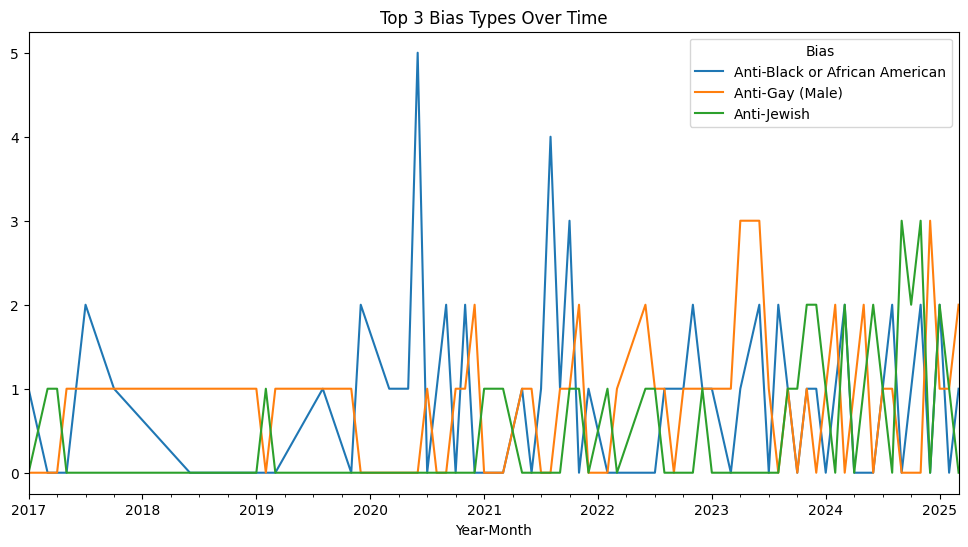

In [ ]:
# Visualize the top 10 most common bias types in horizontal bar chart
bias_counts.head(10).plot(kind='barh', figsize=(10,6))

grouped.plot(figsize=(12, 6), title='Top 3 Bias Types Over Time')

In [ ]:
# Print the total number of unique bias types in the dataset
print("Unique Bias Types:", df['Bias'].nunique())
filtered_df = df[df['Bias'].isin(top_biases)]

In [ ]:
print(filtered_df['Offense(s)'].unique()[:10])  # Just a peek at first few

# Create a Year-Month period column for time-based grouping and analysis
df['Year-Month'] = df['Date of Incident'].dt.to_period('M')

['Aggravated Assault' 'Destruction' 'Simple Assault' 'Intimidation'
 'Assault' 'Vandalism' 'Criminal Mischief' 'Assault by Contact'
 'Assault by Threat' 'Bomb Threat']


### Offense Type Analysis

Let's examine the relationship between bias types and offense types to understand patterns.

In [24]:
pivot = filtered_df.pivot_table(
    index='Bias',
    columns='Offense(s)',
    aggfunc='size',
    fill_value=0
)

In [ ]:
# Define and filter for the top 3 most common bias types
top_biases = ['Anti-Black or African American', 'Anti-Gay (Male)', 'Anti-Jewish']
filtered_df = df[df['Bias'].isin(top_biases)]

pivot = pivot.loc[:, pivot.sum().sort_values(ascending=False).index]

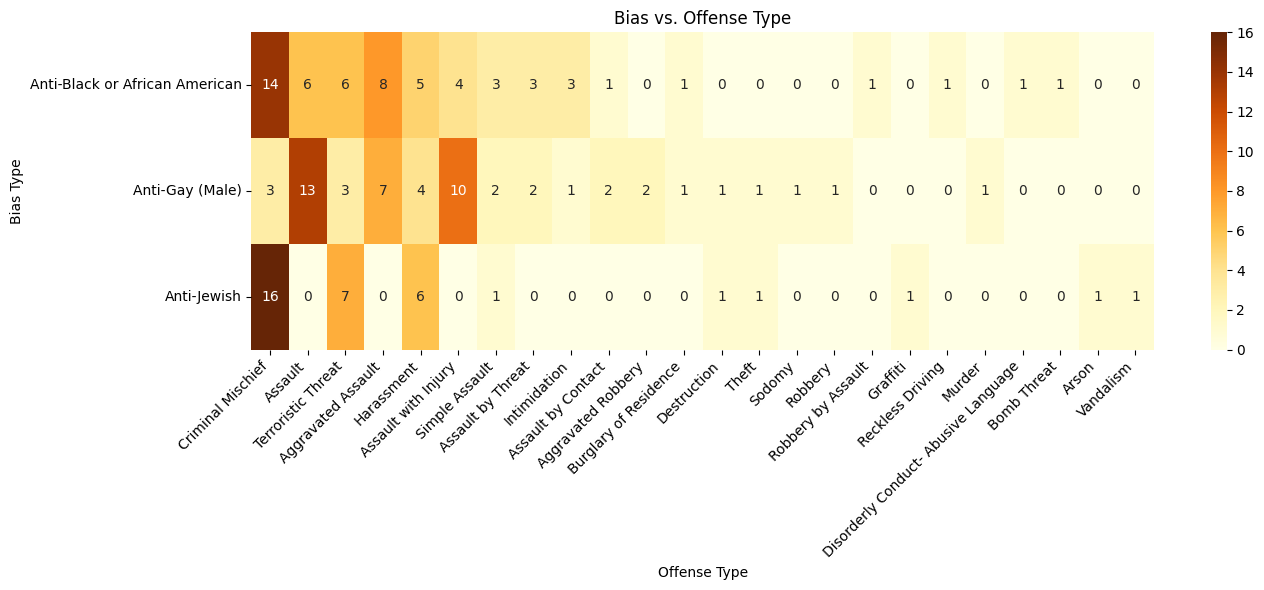

In [26]:
import seaborn as sns
plt.figure(figsize=(14, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Bias vs. Offense Type')
plt.xlabel('Offense Type')
plt.ylabel('Bias Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [ ]:
bias_encoded = pd.get_dummies(df['Bias'])
bias_encoded.head()

# Group data by time period and bias type to analyze trends over time
grouped = filtered_df.groupby(['Year-Month', 'Bias']).size().unstack().fillna(0)

,Anti-American Indian/Alaskan Native,Anti-Arab,Anti-Asian,Anti-Bisexual,Anti-Black,Anti-Black or African American,Anti-Black or African American; Anti-Gay (Male),Anti-Buddhist,Anti-Disability,Anti-Female,...,"Anti-Multi Races, Group",Anti-Multi-Races Group; Anti-Islamic,Anti-Other Race/Ethnicity/Ancestry,Anti-Other Religion,Anti-Physical Disability,Anti-Protestant,Anti-Religion (Other),Anti-Transgender,Anti-White,Anti-White/Anti-Hispanic or Latino
0,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Feature Engineering

### One-Hot Encoding Categorical Variables

To prepare for machine learning, we'll convert categorical variables into binary features using one-hot encoding.

In [ ]:
# Plot time series showing trends for the top 3 bias types
grouped.plot(figsize=(12, 6), title='Top 3 Bias Types Over Time')

bias_encoded.shape

(266, 36)

In [ ]:
df.columns

# Re-filter dataset for top 3 bias types (redundant but kept for clarity)
filtered_df = df[df['Bias'].isin(top_biases)]


Index(['Month', 'Incident Number', 'Date of Incident', 'Day of Week',
       'Number of Victims under 18', 'Number of Victims over 18',
       'Number of Offenders under 18', 'Number of Offenders over 18',
       'Race/Ethnicity of Offenders', 'Offense(s)', 'Offense Location', 'Bias',
       'Zip Code', 'APD Sector', 'Council District', 'Year-Month'],
      dtype='object')

In [ ]:
# Preview the first 10 unique offense types in the filtered dataset
print(filtered_df['Offense(s)'].unique()[:10])  # Just a peek at first few

array(['Aggravated Assault', 'Destruction', 'Simple Assault',
       'Intimidation', 'Robbery', 'Vandalism', 'Burglary/Assault',
       'Assault', 'Theft', 'Criminal Mischief', 'Assault by Threat',
       'Assault by Contact', 'Assault with Injury', 'Bomb Threat',
       'Reckless Driving', 'Burglary of Residence', 'Terroristic Threat',
       'Robbery by Assault', 'Disorderly Conduct- Abusive Language',
       'Assault by Injury', 'Harassment', 'Arson', 'Aggravated Robbery',
       'Injury to Child', 'Sodomy', 'Burglary of Non Residence', 'Murder',
       'False Report', 'Harassment/Criminal Mischief', 'Graffiti'],
      dtype=object)

In [35]:
offense_dummies = pd.get_dummies(df['Offense(s)'], prefix='offense')
offense_dummies.head()

,offense_Aggravated Assault,offense_Aggravated Robbery,offense_Arson,offense_Assault,offense_Assault by Contact,offense_Assault by Injury,offense_Assault by Threat,offense_Assault with Injury,offense_Bomb Threat,offense_Burglary of Non Residence,...,offense_Intimidation,offense_Murder,offense_Reckless Driving,offense_Robbery,offense_Robbery by Assault,offense_Simple Assault,offense_Sodomy,offense_Terroristic Threat,offense_Theft,offense_Vandalism
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
# Create a pivot table to analyze the relationship between bias types and offense types
pivot = filtered_df.pivot_table(
    index='Bias',
    columns='Offense(s)',
    aggfunc='size',
    fill_value=0
)

encoded_df = pd.get_dummies(df['Offense(s)'])
pd.concat([df, encoded_df], axis=1)


,Month,Incident Number,Date of Incident,Day of Week,Number of Victims under 18,Number of Victims over 18,Number of Offenders under 18,Number of Offenders over 18,Race/Ethnicity of Offenders,Offense(s),...,Intimidation,Murder,Reckless Driving,Robbery,Robbery by Assault,Simple Assault,Sodomy,Terroristic Threat,Theft,Vandalism
0,Jan,2017-241137,2017-01-01,Sun,0.0,1,0,1,White/Not Hispanic,Aggravated Assault,...,False,False,False,False,False,False,False,False,False,False
1,Feb,2017-580344,2017-02-01,Wed,0.0,1,0,1,Black or African American/Not Hispanic,Aggravated Assault,...,False,False,False,False,False,False,False,False,False,False
2,Mar,2017-800291,2017-03-21,Tue,0.0,0,0,0,Unknown,Destruction,...,False,False,False,False,False,False,False,False,False,False
3,Apr,2017-1021534,2017-04-12,Wed,0.0,0,0,0,White/Unknown,Simple Assault,...,False,False,False,False,False,True,False,False,False,False
4,May,2017-1351550,2017-05-15,Mon,1.0,0,1,2,White/Not Hispanic,Simple Assault,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Feb,2025-9004370,2025-02-27,Thu,0.0,1,0,1,White/Non-Hispanic,Harassment,...,False,False,False,False,False,False,False,False,False,False
262,Mar,2025-601075,2025-03-02,Sun,1.0,0,0,1,White/Non-Hispanic,Assault,...,False,False,False,False,False,False,False,False,False,False
263,Mar,2025-640147,2025-03-05,Wed,0.0,1,0,1,White/Non-Hispanic,Assault,...,False,False,False,False,False,False,False,False,False,False
264,Mar,2025-9004907,2025-03-07,Fri,0.0,1,0,2,White/Non-Hispanic,Harassment,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Create one-hot encoded features for offense types (without prefix)
encoded_df = pd.get_dummies(df['Offense(s)'])

# Combine original dataframe with encoded offense features
combined_df = pd.concat([df, encoded_df], axis=1)

# Display the first few rows of the combined dataframe
combined_df.head()# Create one-hot encoded features for offense types with 'offense' prefix
offense_dummies = pd.get_dummies(df['Offense(s)'], prefix='offense')
offense_dummies.head()# Examine unique offense types in the dataset
df['Offense(s)'].unique()# Display all column names in the original dataframe
df.columns
# Check the dimensionality of the encoded bias features
bias_encoded.shape# Create one-hot encoded features for 'Bias' column
bias_encoded = pd.get_dummies(df['Bias'])
bias_encoded.head()# Import seaborn for enhanced visualization
import seaborn as sns

# Create a heatmap to visualize the relationship between bias types and offense types
plt.figure(figsize=(14, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlOrBr')
plt.title('Bias vs. Offense Type')
plt.xlabel('Offense Type')
plt.ylabel('Bias Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
# Sort columns by frequency (most common offense types first)
pivot = pivot.loc[:, pivot.sum().sort_values(ascending=False).index]

## Conclusion

In this notebook, we've performed:

1. **Data Cleaning**: Handling missing values and converting data types
2. **Exploratory Data Analysis**: Examining bias distributions and temporal trends
3. **Relationship Analysis**: Visualizing connections between bias types and offenses
4. **Feature Engineering**: Creating one-hot encoded features for categorical variables

### Next Steps

- Implement clustering to identify patterns in hate crime incidents
- Create classification models to predict bias types based on other features
- Perform association rule mining to discover relationships between variables
- Develop geospatial visualizations to analyze geographic patterns